## K-Means clustering, Housing Project

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
housing_df = pd.read_excel("/Volumes/T7/Career/School/MSADSB/BTA 520/housing2.xlsx")

In [4]:
# Select the features to cluster on
X = housing_df[['yearBuilt', 'bathrooms', 'bedrooms', 'livingArea', 'propertyTaxRate']]

In [5]:
# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/jwitch/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jwitch/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jwitch/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jwitch/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jwitch/an

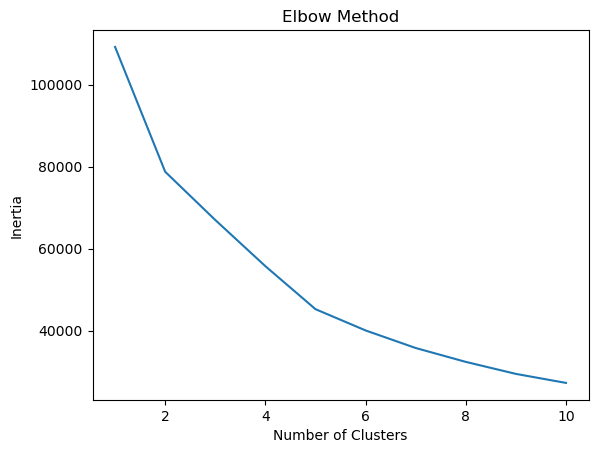

In [6]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [7]:
# Based on the elbow plot, set the number of clusters to 5
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit(X_scaled)

# Add the cluster labels to the original dataset
housing_df['cluster'] = kmeans.labels_

/Users/jwitch/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The output of the script will be the mean price, last sold price, zestimate, and days on Zillow for each of the five clusters. The business can then use this information to identify clusters that are attractive for growth in the real estate business based on their goals and market conditions.

In [8]:
# Display the cluster statistics
cluster_stats = housing_df.groupby('cluster')[['price', 'lastSoldPrice', 'zestimate', 'daysOnZillow']].mean()
print(cluster_stats)

                price  lastSoldPrice     zestimate  daysOnZillow
cluster                                                         
0        4.416968e+05   4.417274e+05  4.795631e+05    182.941105
1        5.913707e+05   5.915854e+05  6.678430e+05    192.908059
2        5.808931e+05   5.809553e+05  6.340142e+05    188.385453
3        1.134758e+06   1.132869e+06  1.245567e+06    190.330664
4        5.711244e+05   5.711244e+05  5.750857e+05    155.714286


In [9]:
# Remove outliers and Rerun

from sklearn.datasets import make_regression
import seaborn as sns

Text(0, 0.5, 'Price ($)')

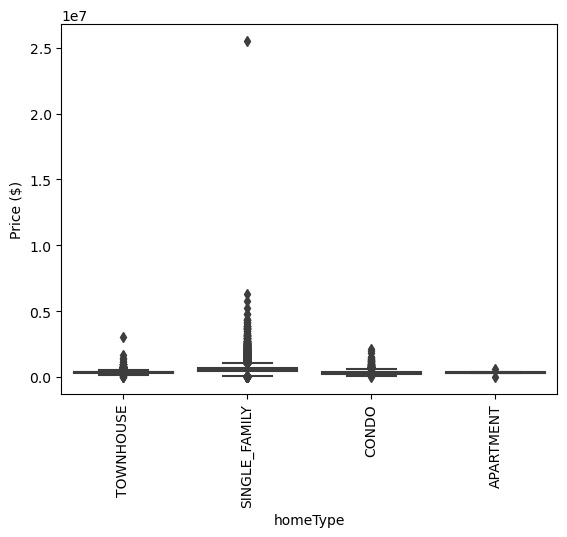

In [10]:
sns.boxplot(y = 'price', x= 'homeType', data= housing_df)
plt.xticks(rotation= 90)
plt.ylabel('Price ($)')

In [11]:
def remove_outlier_IQR(housing_df):
    Q1=housing_df.quantile(0.25)
    Q3=housing_df.quantile(0.75)
    IQR=Q3-Q1
    df_final=housing_df[~((housing_df<(Q1-1.5*IQR)) | (housing_df>(Q3+1.5*IQR)))]
    return df_final

Text(0, 0.5, 'Price ($)')

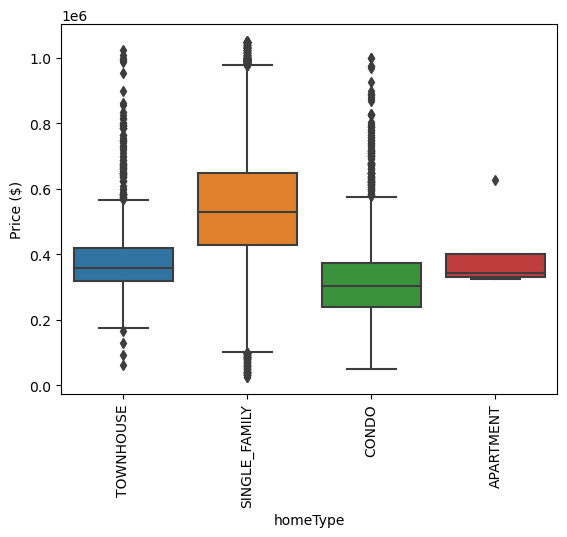

In [12]:
df_outlier_removed=remove_outlier_IQR(housing_df.price)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=housing_df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=housing_df.drop([ind_diff[i]])
    housing_df=df_final
    
sns.boxplot(y='price', x='homeType',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [13]:
# Rerun Kmeans with new df
# Select the features to cluster on
X = df_final[['yearBuilt', 'bathrooms', 'bedrooms', 'livingArea', 'propertyTaxRate']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/jwitch/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jwitch/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jwitch/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jwitch/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jwitch/an

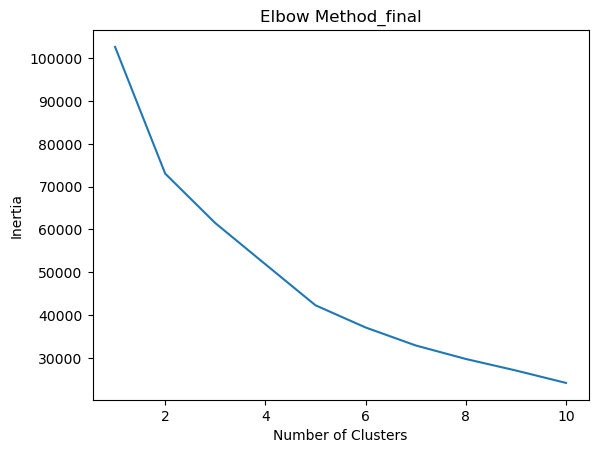

In [14]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method_final')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
# Based on the elbow plot, set the number of clusters to 5
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit(X_scaled)

# Add the cluster labels to the original dataset
df_final['cluster'] = kmeans.labels_

/Users/jwitch/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The output of the script will be the mean price, last sold price, zestimate, and days on Zillow for each of the five clusters. The business can then use this information to identify clusters that are attractive for growth in the real estate business based on their goals and market conditions.

In [16]:
# Display the cluster statistics
cluster_stats = df_final.groupby('cluster')[['price', 'lastSoldPrice', 'zestimate', 'daysOnZillow']].mean()
print(cluster_stats)

                 price  lastSoldPrice      zestimate  daysOnZillow
cluster                                                           
0        382095.907913  381633.917094  424839.209560    181.739130
1        677486.549979  677307.987608  744700.865964    198.012185
2        490545.374582  490353.340445  535878.853881    184.946373
3        583137.015431  583027.212103  659390.686838    194.740091
4        571124.428571  571124.428571  575085.714286    155.714286


In [17]:
df_final

,zipcode,price,lastSoldPrice,homeStatus,yearBuilt,bathrooms,bedrooms,daysOnZillow,zestimate,homeType,resoFacts/roofType,lastSoldPrice.1,livingArea,priceHistory/1/price,propertyTaxRate,cluster
0,97024,315400,315400,RECENTLY_SOLD,2007,3.0,3,25,317406,TOWNHOUSE,Shake / Shingle,315400,1806,212000,1.12,2
1,97080,512000,512000,RECENTLY_SOLD,1982,3.0,4,11,512355,SINGLE_FAMILY,Composition,512000,2724,479000,1.12,1
2,97080,404200,404200,RECENTLY_SOLD,1967,2.0,3,14,397479,SINGLE_FAMILY,Composition,404200,1150,204500,1.12,2
3,97030,478200,478200,RECENTLY_SOLD,1978,2.0,3,25,481241,SINGLE_FAMILY,Other,478200,2036,265000,1.12,2
4,97080,530000,530000,RECENTLY_SOLD,2018,2.0,4,26,532813,SINGLE_FAMILY,Composition,530000,1947,480000,1.12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21831,97008,415000,415000,RECENTLY_SOLD,1977,2.0,3,363,489400,SINGLE_FAMILY,Composition,415000,1378,389000,1.13,2
21832,97007,615000,615000,RECENTLY_SOLD,1974,3.0,4,364,725500,SINGLE_FAMILY,Metal,615000,2176,575000,1.13,1
21833,97008,380000,380000,RECENTLY_SOLD,2001,2.0,2,45,387200,TOWNHOUSE,Other,380000,1466,380000,1.13,2
21834,97223,57997,57997,RECENTLY_SOLD,1920,2.0,3,320,563700,SINGLE_FAMILY,Other,57997,1450,359900,1.13,2


In [18]:
len(df_final)


20528

In [19]:
sold_df = df_final[df_final['homeStatus'].str.contains("RECENTLY_SOLD")]
sold_df

,zipcode,price,lastSoldPrice,homeStatus,yearBuilt,bathrooms,bedrooms,daysOnZillow,zestimate,homeType,resoFacts/roofType,lastSoldPrice.1,livingArea,priceHistory/1/price,propertyTaxRate,cluster
0,97024,315400,315400,RECENTLY_SOLD,2007,3.0,3,25,317406,TOWNHOUSE,Shake / Shingle,315400,1806,212000,1.12,2
1,97080,512000,512000,RECENTLY_SOLD,1982,3.0,4,11,512355,SINGLE_FAMILY,Composition,512000,2724,479000,1.12,1
2,97080,404200,404200,RECENTLY_SOLD,1967,2.0,3,14,397479,SINGLE_FAMILY,Composition,404200,1150,204500,1.12,2
3,97030,478200,478200,RECENTLY_SOLD,1978,2.0,3,25,481241,SINGLE_FAMILY,Other,478200,2036,265000,1.12,2
4,97080,530000,530000,RECENTLY_SOLD,2018,2.0,4,26,532813,SINGLE_FAMILY,Composition,530000,1947,480000,1.12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21831,97008,415000,415000,RECENTLY_SOLD,1977,2.0,3,363,489400,SINGLE_FAMILY,Composition,415000,1378,389000,1.13,2
21832,97007,615000,615000,RECENTLY_SOLD,1974,3.0,4,364,725500,SINGLE_FAMILY,Metal,615000,2176,575000,1.13,1
21833,97008,380000,380000,RECENTLY_SOLD,2001,2.0,2,45,387200,TOWNHOUSE,Other,380000,1466,380000,1.13,2
21834,97223,57997,57997,RECENTLY_SOLD,1920,2.0,3,320,563700,SINGLE_FAMILY,Other,57997,1450,359900,1.13,2


In [20]:
len(sold_df)

20472

In [21]:
df_final.to_excel("housing_normal.xlsx", index = False)

len(df_final)